# Report 03- 服装分类

* 姓名：石宇洋
* 学号：2019301660

## 任务简介

* 任务类型：多分类 


* 背景介绍：FashionMNIST 是一个替代 MNIST 手写数字集的图像数据集。 它是由 Zalando（一家德国的时尚科技公司）旗下的研究部门提供。其涵盖了来自 10 种类别的共 7 万个不同商品的正面图片。FashionMNIST 的大小、格式和训练集/测试集划分与原始的 MNIST 完全一致。

* 数据集介绍：60000/10000 的训练测试数据划分，28x28 的灰度图片。可以直接用它来测试你的机器学习和深度学习算法性能，且不需要改动任何的代码。

## 解题思路

​     本次的题目涉及到对图片的图像处理与机器学习多分类问题，因为之前有接触过Opencv以及Tensorflow的相关知识，所以对于此处的图像处理有一定的想法💡。不过，报告中要求的从网上“爬取”图片功能，是第一次接触，所以需要先去了解相关的爬虫知识，以及学会简单写出一些爬虫的代码来完成任务。总的来说，本次的任务大概有几点：

* 了解FashionMNIST 数据集，对数据集进行**预处理**。
* 利用之前**写过的模型**（自己写的NN、Sklearn的MLP网络、随机森林）进行对服装**训练并分类**。
* **写爬虫代码**，从网上爬取服装类图片。
* 对爬取的**图片进行处理**（将图片转换为数据形式，从而进行机器学习分类）
* 利用之前**写过的模型**对爬取的图片进行分类
* 利用**Tensorflow搭建CNN网络**进行分类（利用网上爬取的图片训练生成CNN模型.h5文件，并保存进行分类测试）

​       通过查看FashionMNIST 数据集的介绍，得知了数据集的图像集是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。标签是整数数组，介于 0 到 9 之间。这些标签对应于图像所代表的服装类：

| 标签 |    类    |
| :--: | :------: |
|  0   | T恤/上衣 |
|  1   |   裤子   |
|  2   |  套头衫  |
|  3   |  连衣裙  |
|  4   |   外套   |
|  5   |   凉鞋   |
|  6   |   衬衫   |
|  7   |  运动鞋  |
|  8   |    包    |
|  9   |   短靴   |



## 开始操作

## 1.预处理数据，查看数据集

这里，我没有使用报告中提供的 “**.npy**”文件，而是选择直接从Keras里面进行导入。

### 1）导入第三方库 

In [1]:
# 导入第三方库
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

### 2)导入FashionMNIST数据集

In [2]:
fashion_mnist=keras.datasets.fashion_mnist #从Keras导入数据集
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
print(np.shape(train_images))
print(np.shape(train_labels))
#这里为了对应数据里的图像，所以我这里先设置一个列表，储存每一类标签的中文对应词
numberlabels_to_Chineselabels=['T恤/上衣','裤子','套头衫','连衣裙','外套',
               '凉鞋','衬衫','运动鞋','包','短靴']

(60000, 28, 28)
(60000,)


可以发现图像是 “28x28” 的 NumPy 数组，标签是整数数组。  
训练集是60000个样本，预测集是10000个样本。

### 3）查看数据集和图像

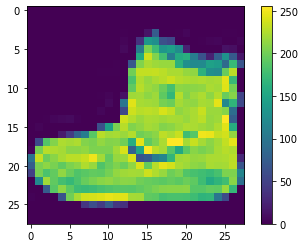

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [4]:
train_images=train_images/255.0
test_images=test_images/255.0
# 将图像集从（28,28)转换为(28*28,1)
train_images=np.reshape(train_images,(60000,28*28))
test_images=np.reshape(test_images,(10000,28*28))
print(np.shape(train_images))

(60000, 784)


## 2.利用MLP进行分类
### 1)导入第三方库

In [5]:
from sklearn.neural_network import MLPClassifier
import time
from tensorflow import keras
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib
from matplotlib import pyplot as plt

### 2)导入和预处理数据集

In [6]:
fashion_mnist=keras.datasets.fashion_mnist #从Keras导入数据集
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
train_images=np.reshape(train_images,(60000,28*28))
test_images=np.reshape(test_images,(10000,28*28))
train_images=train_images/255.0
test_images=test_images/255.0

### 3)MLP训练

In [7]:
mlp=MLPClassifier(max_iter=1000)
mlp_x_train=train_images[:] #生成训练数据集样本
mlp_y_train=train_labels[:] #生成训练数据集标签
time_start=time.time() #计时
mlp.fit(mlp_x_train,mlp_y_train) #训练
time_end=time.time() #结束计时
print(f'训练用时{time_end-time_start}s')

训练用时219.25444388389587s


### 4)MLP预测

In [8]:
mlp_predict=mlp.predict(test_images) #预测
train_dataset_accuracy=accuracy_score(test_labels,mlp_predict) #得到训练数据集的预测正确率
print(f'使用训练数据集测试MLP模型，正确率为{train_dataset_accuracy*100}%')

使用训练数据集测试MLP模型，正确率为87.99%


### 5)结果可视化

In [9]:
def plot_image(i,predict_label,true_label,img):
    img=np.reshape(img,(10000,28,28)) #现将img转换为28*28的数组
    predict_label,true_label,img=predict_label[i],true_label[i],img[i]
    plt.imshow(img,cmap=plt.cm.binary) #绘制出img
    if predict_label==true_label:
        plt.xlabel(f'{numberlabels_to_Chineselabels[predict_label]}(正确)',
                   fontproperties='Heiti TC',size=16,color='blue') #正确
    else:
        plt.xlabel(f'{numberlabels_to_Chineselabels[predict_label]}(错误)',
                   fontproperties='Heiti TC',size=16,color='red') #错误

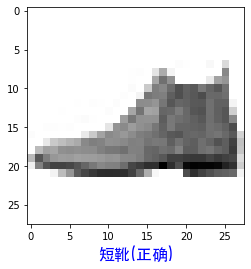

In [10]:
# i代表第几个图像，predict_label为预测得到的标签，true_label为真实的标签，img为图像集
plot_image(i=0,predict_label=mlp_predict,true_label=test_labels,img=test_images)

i代表第几个图像，predict_label为预测得到的标签，true_label为真实的标签，img为图像集  
除了一个一个看结果，我们还可以把图像的每一种标签概率打印出来，并做成 **“柱状图”**。

### 6)利用softmax看每一个标签的概率

In [11]:
probability=mlp.predict_proba(test_images) #得到每个标签的概率
def plot_probability(i,probability,true_label):
    probability,true_label=probability[i],true_label[i]
    plt.xticks(range(10)) #x轴刻度范围
    bar=plt.bar(range(10),probability,color='yellow') #绘制柱状图
    plt.ylim([0,1]) #y轴范围
    predict_label=np.argmax(probability) #概率最高的为预测标签
    bar[predict_label].set_color('red') #预测标签的对应颜色
    bar[true_label].set_color('blue') #正确标签的对应颜色

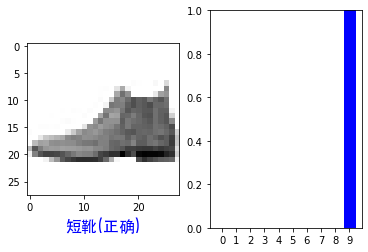

In [12]:
# i代表第几个图像，probability为每种标签的概率，true_label为真实的标签
# plot_probability(i=0,probability=probability,true_label=test_labels)
plt.subplot(121)
plot_image(i=0,predict_label=mlp_predict,true_label=test_labels,img=test_images)
plt.subplot(122)
plot_probability(i=0,probability=probability,true_label=test_labels)

i代表第几个图像，probability为每种标签的概率，true_label为真实的标签  
可以看到结果是一一对应的，不过好像目前只能展示一个预测对象，我想写一个函数让其可以一次展示多个对象
### 7)对多个样本进行可视化

In [13]:
def plot_many(row,column,predict_label,true_label,img,probability):
    num=row*column  #总共要绘制图片数
    plt.figure(figsize=(2*2*column,2*row)) #先将所有图片数量定义好
    for i in range(num):
        plt.subplot(row,2*column,2*i+1)
        plot_image(i,predict_label,true_label,img)
        plt.subplot(row,2*column,2*i+2)
        plot_probability(i,probability,true_label)
    plt.tight_layout()
    plt.show()

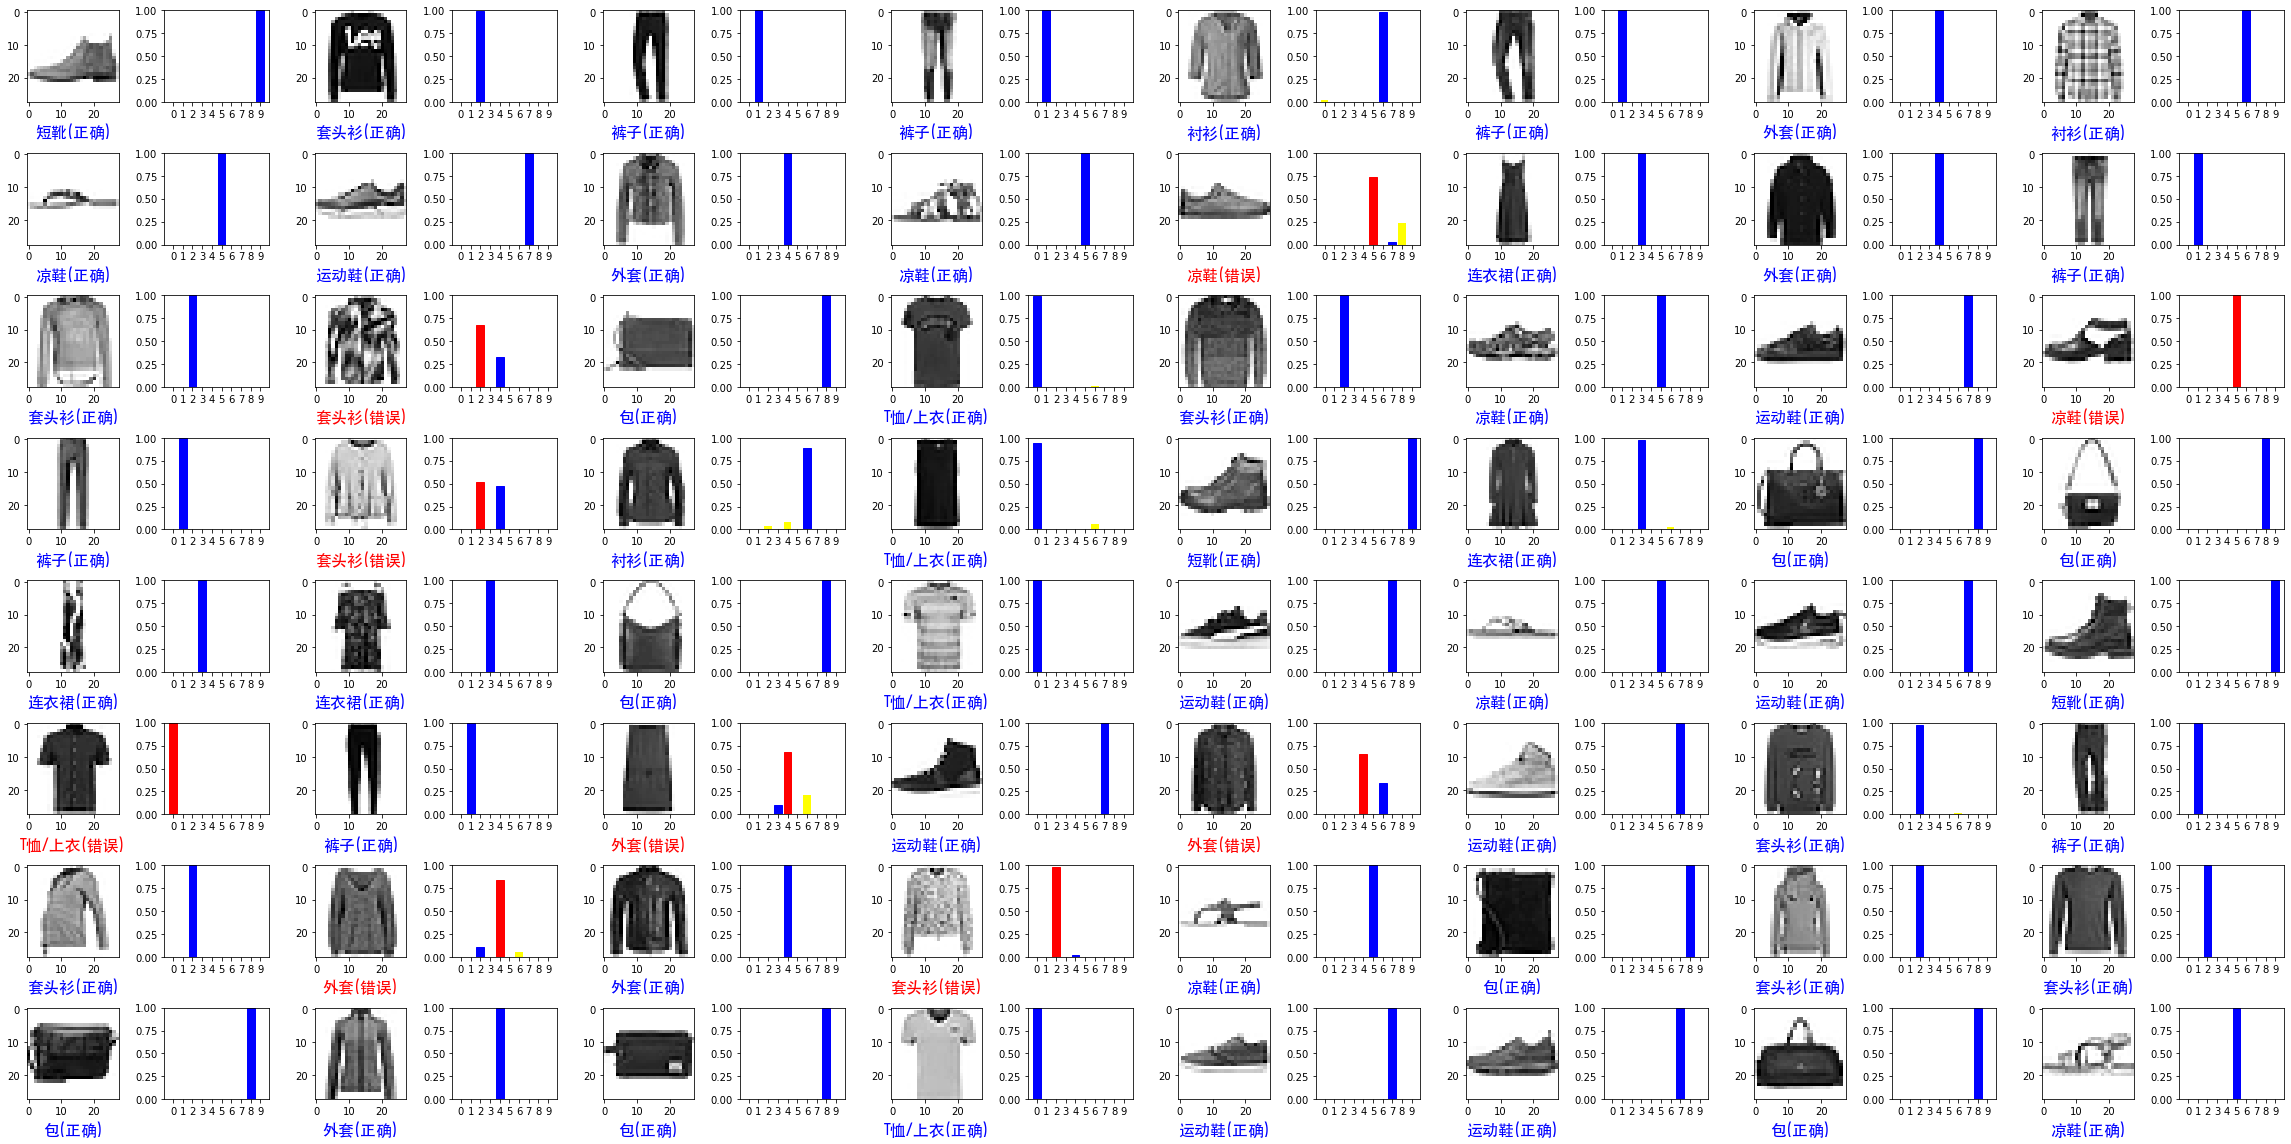

In [14]:
# row代表行，column代表列，predict_label为预测得到的标签，true_label为真实的标签，img为图像集，probability为每种标签的概率
plot_many(row=8,column=8,predict_label=mlp_predict,
          true_label=test_labels,img=test_images,probability=probability)

row代表行，column代表列，predict_label为预测得到的标签，true_label为真实的标签，img为图像集，probability为每种标签的概率  
### 8）总结
这里只是展示了一小部分结果，可以看出来这种可视化效果还是很不错的  
不过，看起来好像MLP训练后的模型正确率并不高，还不到90%，(｡ì _ í｡)  
让我们试一试其他的模型，看看效果怎么样(^_^)a

## 3.自己写的全连接NN
这个自己写的全连接NN，经过了“**第一个**”和“**第二个**”报告的测试，虽然说时间比之其他的模型来说长了“不少”（这个“不少”是真的不少(｡ì _ í｡)）不过，它的精度还是在能够接受的范围内，让我们来看看它在这里的表演怎么样。
### 1)导入第三方库

In [15]:
import NN
import time
from tensorflow import keras
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

### 2导入和预处理数据集

In [16]:
fashion_mnist=keras.datasets.fashion_mnist #从Keras导入数据集
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
train_images=np.reshape(train_images,(60000,28*28))
test_images=np.reshape(test_images,(10000,28*28))
train_images=train_images/255.0
test_images=test_images/255.0
numberlabels_to_Chineselabels=['T恤/上衣','裤子','套头衫','连衣裙','外套',
               '凉鞋','衬衫','运动鞋','包','短靴'] #这里为了对应数据里的图像，所以我这里先设置一个列表，储存每一类标签的中文对应词

### 3)自己写的NN训练

In [17]:
# 此处因为自己写的NN网络过于菜，所以这里只训练了2000个样本，多了属实用时太长
nn=NN.NN(train_images[:5000],train_labels[:5000])
# 这里是输入28*28个维度，隐层2个维度，输出2个维度，alpha为试出来感觉比较好的值，计算1000次
nn.change_Parameters(input_num=28*28,hide_num=40
                     ,output_num=10,alpha=0.001,times=2000)
time_start=time.time()# 计时
nn.init_wb() #初始化
nn.back_calculate() #反向传播计算
time_end=time.time() #结束计时
print(f'训练用时{time_end-time_start}s')

经过0次训练，模型预计精准度为10.02%
经过100次训练，模型预计精准度为74.1%
经过200次训练，模型预计精准度为79.74%
经过300次训练，模型预计精准度为83.32000000000001%
经过400次训练，模型预计精准度为85.68%
经过500次训练，模型预计精准度为87.02%
经过600次训练，模型预计精准度为87.53999999999999%
经过700次训练，模型预计精准度为87.82%
经过800次训练，模型预计精准度为88.36%
经过900次训练，模型预计精准度为89.86%
经过1000次训练，模型预计精准度为89.66%
经过1100次训练，模型预计精准度为90.66%
经过1200次训练，模型预计精准度为90.36%
经过1300次训练，模型预计精准度为90.78%
经过1400次训练，模型预计精准度为91.25999999999999%
经过1500次训练，模型预计精准度为91.24%
经过1600次训练，模型预计精准度为92.04%
经过1700次训练，模型预计精准度为91.92%
经过1800次训练，模型预计精准度为91.92%
经过1900次训练，模型预计精准度为92.54%
训练用时47.44315814971924s


### 4）自己写的NN预测

In [18]:
# NN预测
nn_predict=nn.predict_no_orgin_labels(test_images) #预测
test_dataset_accuracy=accuracy_score(test_labels,nn_predict) #得到训练数据集的预测正确率
print(f'使用自己使用的NN模型训练，正确率为{test_dataset_accuracy*100}%')

使用自己使用的NN模型训练，正确率为83.36%


### 5)对多个样本进行可视化

In [19]:
# 可视化结果展示
def plot_image(i,predict_label,true_label,img):
    img=np.reshape(img,(10000,28,28)) #现将img转换为28*28的数组
    predict_label,true_label,img=predict_label[i],true_label[i],img[i]
    plt.imshow(img,cmap=plt.cm.binary) #绘制出img
    if predict_label==true_label:
        plt.xlabel(f'{numberlabels_to_Chineselabels[predict_label]}(正确)',
                   fontproperties='Heiti TC',size=16,color='blue') #正确
    else:
        plt.xlabel(f'{numberlabels_to_Chineselabels[predict_label]}(错误)',
                   fontproperties='Heiti TC',size=16,color='red') #错误

# 利用softmax看每一个标签的概率
def plot_probability(i,probability,true_label):
    probability,true_label=probability[i],true_label[i]
    plt.xticks(range(10)) #x轴刻度范围
    bar=plt.bar(range(10),probability,color='yellow')
    plt.ylim([0,1])
    predict_label=np.argmax(probability) #概率最高的为预测标签
    bar[predict_label].set_color('red')
    bar[true_label].set_color('blue')

# 预测一堆图像
def plot_many(row,column,predict_label,true_label,img,probability):
    num=row*column  #总共要绘制图片数
    plt.figure(figsize=(2*2*column,2*row)) #先将所有图片数量定义好
    for i in range(num):
        plt.subplot(row,2*column,2*i+1)
        plot_image(i,predict_label,true_label,img)
        plt.subplot(row,2*column,2*i+2)
        plot_probability(i,probability,true_label)
    plt.tight_layout()
    plt.show()

In [7]:
probability=nn.softmax() #自己写的NN模型的softmax函数
# print(probability)

[[0.09165588 0.09170103 0.09164015 ... 0.10950865 0.09259933 0.15237147]
 [0.085216   0.08535398 0.22885637 ... 0.08513152 0.08530017 0.08561355]
 [0.08582662 0.23087347 0.08533103 ... 0.08584249 0.08522593 0.08522411]
 ...
 [0.09535298 0.08537836 0.08551481 ... 0.08544523 0.21704252 0.0853855 ]
 [0.08519401 0.23082885 0.08537692 ... 0.08521006 0.08515588 0.08529582]
 [0.0863944  0.08642939 0.08646768 ... 0.09222765 0.0874352  0.08639457]]


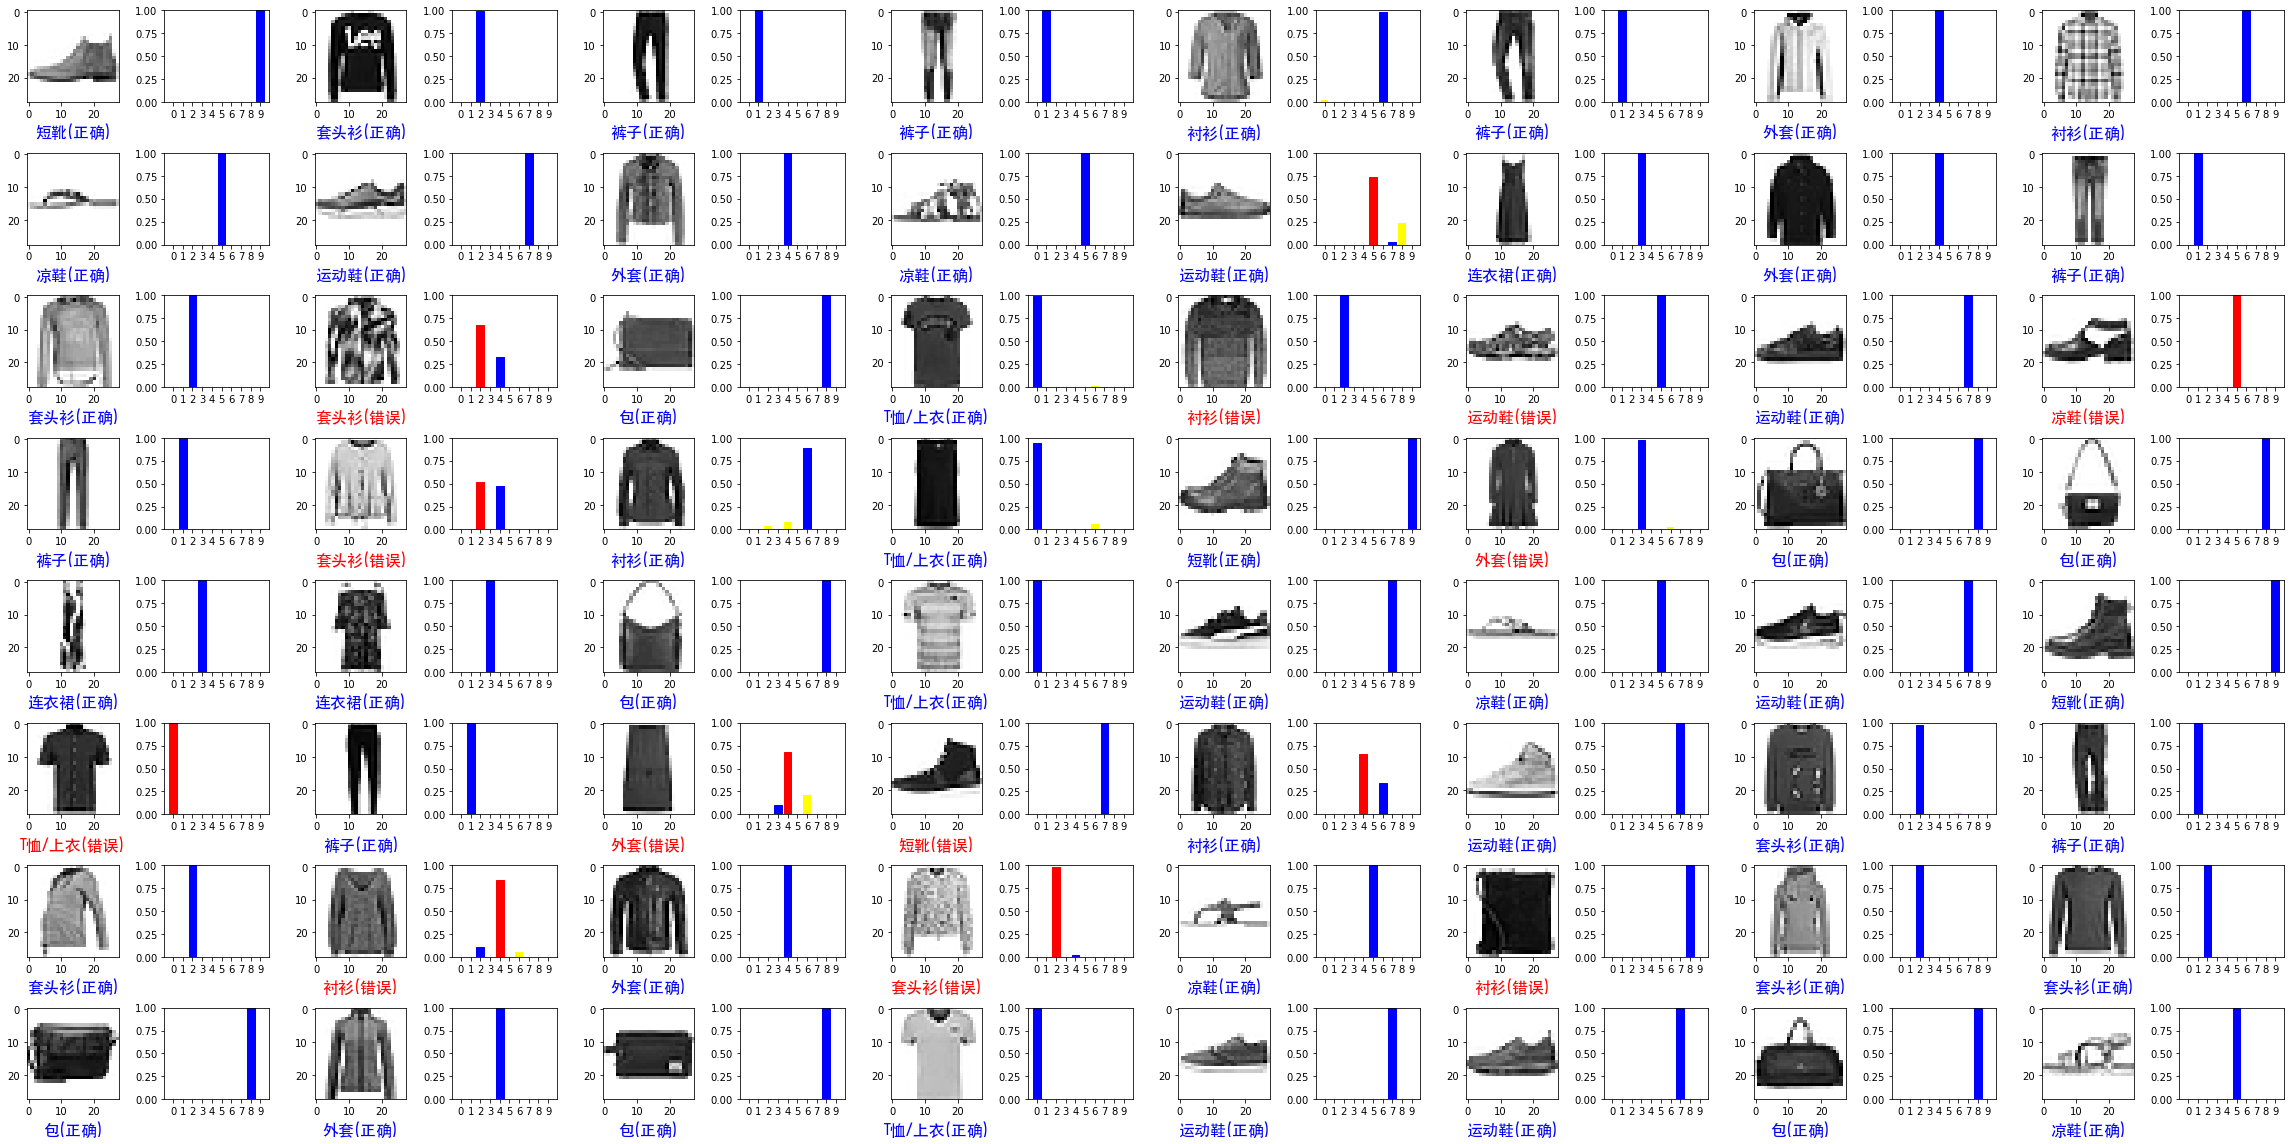

In [20]:
plot_many(row=8,column=8,predict_label=nn_predict,
          true_label=test_labels,img=test_images,probability=probability)

可以见得，自己写的NN虽然正确率更低，没有达到MLP的水平（想想这是很显然的呀(｡ì _ í｡)）  
不过，这一次的训练时间居然比MLP还短↖(^ω^)↗（虽然只用到了5000个图片进行训练）
## 4.随机森林分类
### 1)导入第三方库

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
from tensorflow import keras

### 2)导入和预处理数据集

In [22]:
fashion_mnist=keras.datasets.fashion_mnist #从Keras导入数据集
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
train_images=np.reshape(train_images,(60000,28*28))
test_images=np.reshape(test_images,(10000,28*28))
train_images=train_images/255.0
test_images=test_images/255.0
numberlabels_to_Chineselabels=['T恤/上衣','裤子','套头衫','连衣裙','外套',
               '凉鞋','衬衫','运动鞋','包','短靴'] #这里为了对应数据里的图像，所以我这里先设置一个列表，储存每一类标签的中文对应词

### 3)随机森林训练

In [23]:
rfc=RandomForestClassifier() #创建模型实例
time_start=time.time() #计时
rfc.fit(train_images,train_labels) #训练
time_end=time.time() #结束计时
print(f'训练用时{time_end-time_start}s')

训练用时52.66050910949707s


### 4)随机森林预测

In [24]:
rfc_predict=rfc.predict(test_images) #预测
train_images_accuracy=accuracy_score(test_labels,rfc_predict) #得到训练数据集的预测正确率
print(f'使用训练数据集测试RandomForest模型，正确率为{train_images_accuracy*100}%')

使用训练数据集测试RandomForest模型，正确率为87.58%


### 5)对多个样本进行可视化

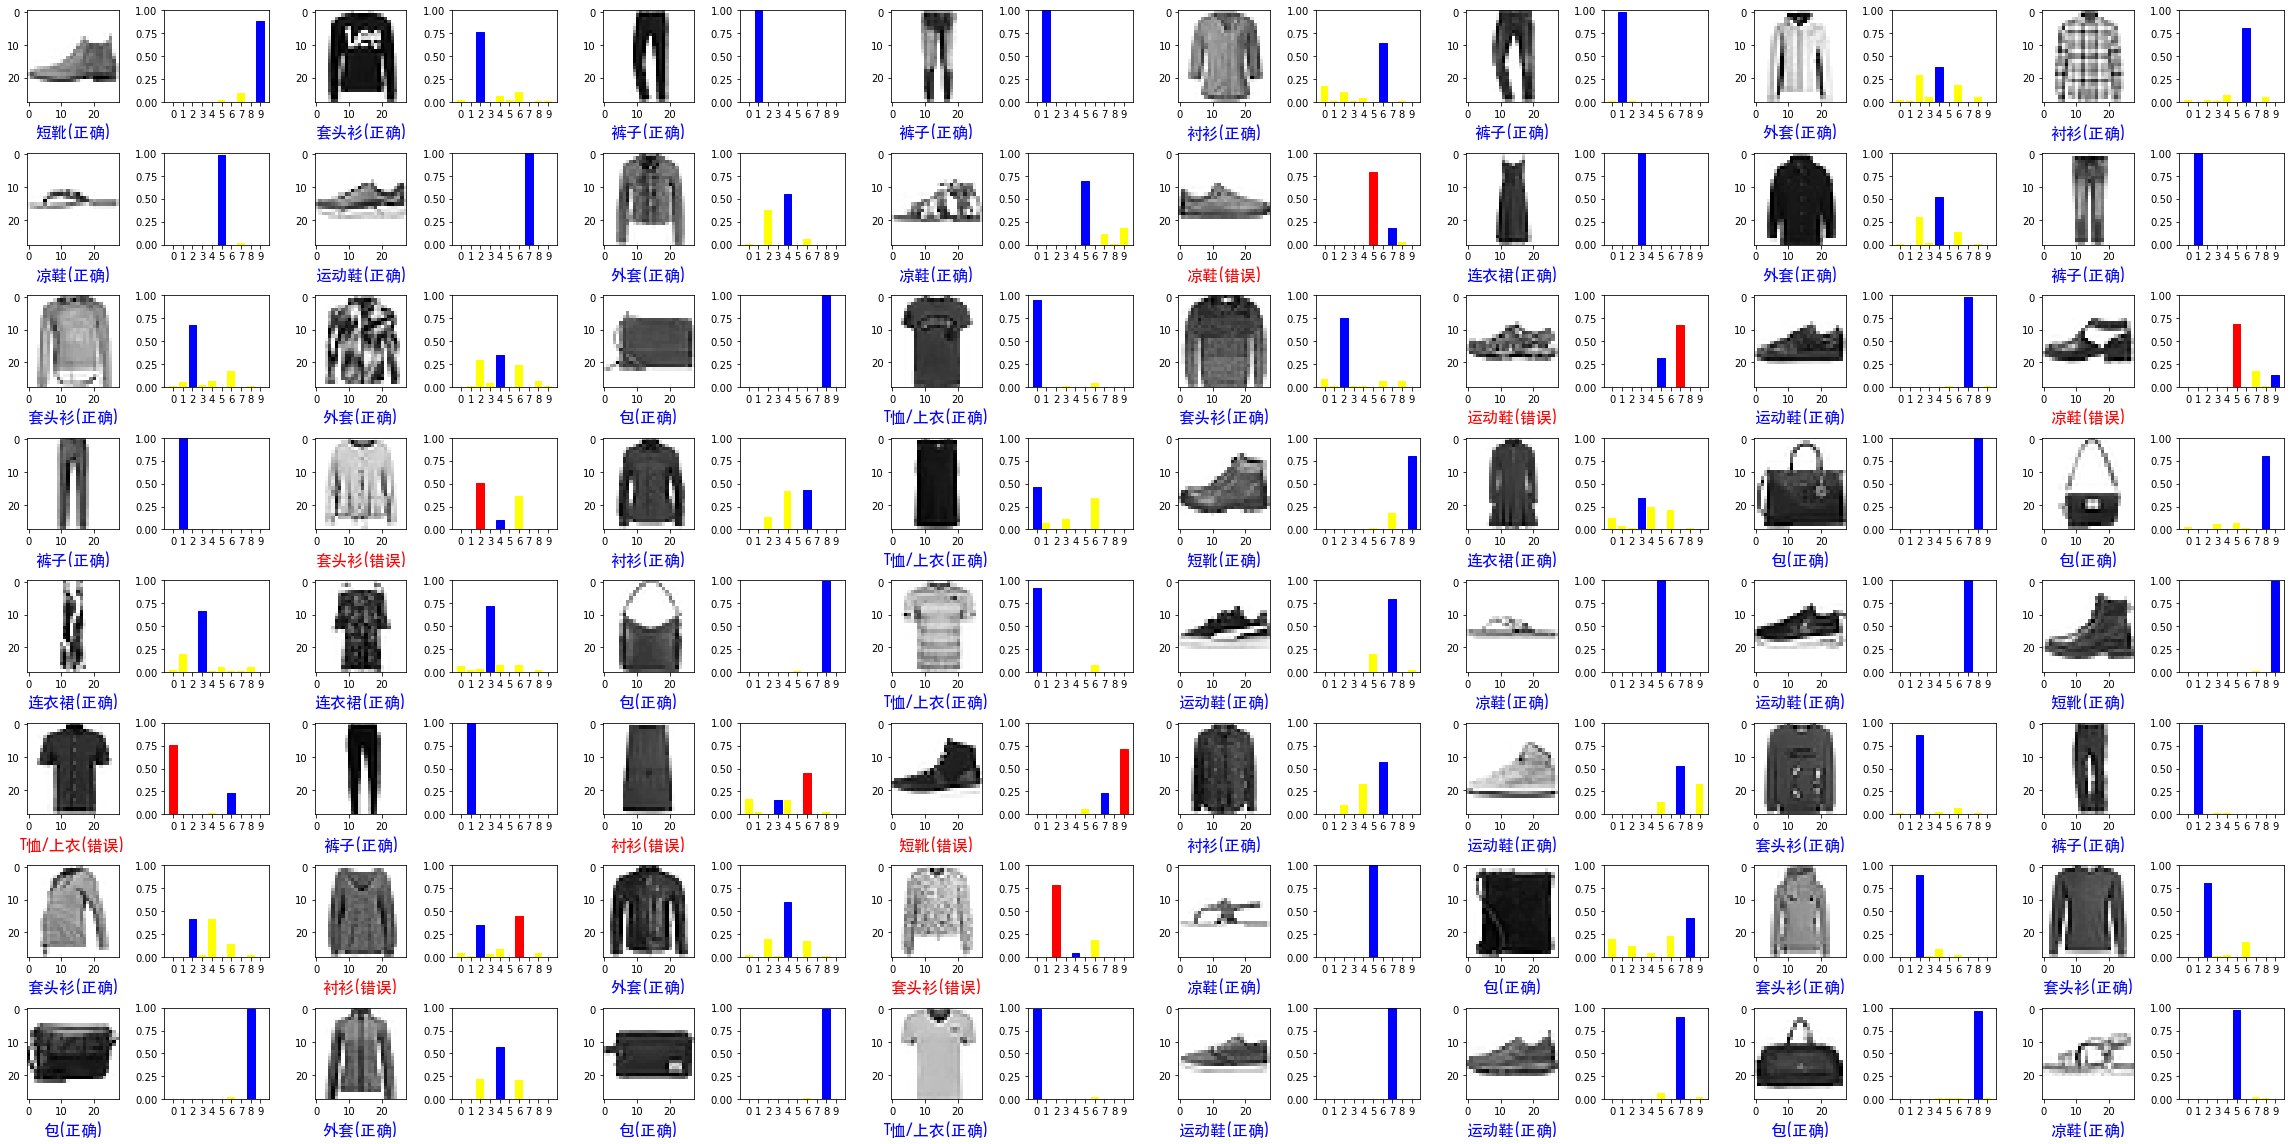

In [25]:
# 可视化结果展示
def plot_image(i,predict_label,true_label,img):
    img=np.reshape(img,(10000,28,28)) #现将img转换为28*28的数组
    predict_label,true_label,img=predict_label[i],true_label[i],img[i]
    plt.imshow(img,cmap=plt.cm.binary) #绘制出img
    if predict_label==true_label:
        plt.xlabel(f'{numberlabels_to_Chineselabels[predict_label]}(正确)',
                   fontproperties='Heiti TC',size=16,color='blue') #正确
    else:
        plt.xlabel(f'{numberlabels_to_Chineselabels[predict_label]}(错误)',
                   fontproperties='Heiti TC',size=16,color='red') #错误

# 利用softmax看每一个标签的概率
probability=rfc.predict_proba(test_images) #得到每个标签的概率
def plot_probability(i,probability,true_label):
    probability,true_label=probability[i],true_label[i]
    plt.xticks(range(10)) #x轴刻度范围
    bar=plt.bar(range(10),probability,color='yellow')
    plt.ylim([0,1])
    predict_label=np.argmax(probability) #概率最高的为预测标签
    bar[predict_label].set_color('red')
    bar[true_label].set_color('blue')


# 预测一堆图像
def plot_many(row,column,predict_label,true_label,img,probability):
    num=row*column  #总共要绘制图片数
    plt.figure(figsize=(2*2*column,2*row)) #先将所有图片数量定义好
    for i in range(num):
        plt.subplot(row,2*column,2*i+1)
        plot_image(i,predict_label,true_label,img)
        plt.subplot(row,2*column,2*i+2)
        plot_probability(i,probability,true_label)
    plt.tight_layout()
    plt.show()
# row代表行，column代表列，predict_label为预测得到的标签，true_label为真实的标签，img为图像集，probability为每种标签的概率
plot_many(row=8,column=8,predict_label=rfc_predict,
          true_label=test_labels,img=test_images,probability=probability)

可以看出随机森林在这里的正确率好像就没有**前两个报告**那么高了，正确率与MLP差不多，不过时间还是比MLP少多了(｡ì _ í｡)  
当然，正确率比我的NN还是要高一些的，不过时间上还是比我的要慢点(^_^)a
## 5.构建爬虫代码，从网上爬取衣服类图片
这里，因为之前没有写过关于爬虫的代码，所以这次任务开始前我先去网上搜寻了一些有关的爬虫知识，通过看别人写好的实例，自己重新来搭建一个爬虫的代码，试一试(^_^)a
### 1)导入第三方库

In [1]:
import requests
import re
import os
import time
import random
from shutil import copy2
import cv2
from PIL import Image

### 2)构建爬虫代码
这里我将url设置为百度，通过百度图片搜寻爬取每种衣物。  
另外，因为url设定，所以这里一次性最少爬取60张图片。  
爬取的图片会保存在当前的工程文件夹中/data中。

In [2]:
def run_getdata():
    # 伪装header，防止识别为爬虫
    headers={
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML,like Gecko) Chrome/84.0.4147.125 Safari/537.36'}
    name=input('请输入爬取的图片类别：')
    # 初始化后续使用变量
    num=0
    num_again=0 #用于保存当前路径(后续使用)
    num_problem=0 #也用于保存文件路径
    # 得到输入图片数量变量(60根据搜索的url所定)
    x=input('请输入要爬取的图片数量？ 1等于60张图片，以此类推：')
    list_1=[]
    filename_total=[]
    file_name=input('请定义保存图片的文件名(图片会保存在：data/文件名)：')
    # 计时
    time_start=time.time()
    for i in range(int(x)):
        # os.getcwd()获得当前的路径
        name_1=os.getcwd()
        # os.path.join连接两个或更多的路径名组件(这里用于保存图片储存路径，保存在当前路径中的/data文件夹)
        name_2=os.path.join(name_1,'data/'+file_name)
        # 创建爬取网站，这里我默认使用Baidu
        url='https://image.baidu.com/search/flip?tn=baiduimage&ie=utf-8&word='
        url=url+name+'&pn='+str(i*30)

        # # 调用request函数，构造一个向服务器请求资源的url对象，返回从服务器获取的所有的相关资源
        # res=requests.get(url,headers=headers)
        # htlm_1=res.content.decode()

        # 这里使用我打算不实用上述的经典get，打算使用Session进行创建对象，之前在网上看到过使用Session可以服务器保持连接，使爬取速度加快
        res=requests.Session()
        htlm_1=res.get(url,headers=headers).content.decode()

        # 正则筛选
        # 匹配查找URL
        a=re.findall('"objURL":"(.*?)",',htlm_1)
        # 检测是否存在路径(这里用于保存图片储存路径，name_2表示保存在当前路径中的/data文件夹)
        if not os.path.exists(name_2):
            # 创建多层目录
            os.makedirs(name_2)
        for b in a:
            try:
                # 添加获取图片的对应网址(为了保证爬取的图片不重复(至少不是相同的网址))
                b_1=re.findall('https:(.*?)&',b)
                b_2=''.join(b_1)
                # 如果没有爬取过这个图片，就进行储存
                if b_2 not in list_1:
                    num=num+1 #用于图片计数
                    # 创建Session
                    imgget=requests.Session()
                    img=imgget.get(b) #获取爬取图片
                    # 新建图片文件进行保存，图片名为XX第几张
                    filename=os.path.join(name_1,'data/'+file_name,name+str(num)+'.png')
                    f=open(filename,'ab')
                    # 打印正在保存第几张
                    print(f'正在下载第{str(num)}张图片')
                    f.write(img.content)
                    f.close()
                    # 将这个图片的信息保存在列表里，保证不重复下载图片
                    list_1.append(b_2)
                    # 保存每个图片的文件名
                    filename_total.append(filename)
                elif b_2 in list_1:
                    num_again=num_again+1
                    continue
            except Exception :
                print(f'第{str(num)}张图片下载出现问题')
                num_problem=num_problem+1
                continue

    # 停止计时
    time_end=time.time()
    print(f'爬取图片完成，总共爬取{num+num_again+num_problem}张,已保存{num}张,重复爬取{num_again}张,爬取出现问题{num_problem}张')
    print(f'总计爬取用时{time_end-time_start}秒')
    # 检测空文件
    # 创建统计空文件数量变量
    num_blank=0
    # 遍历所有刚才下载的文件呢
    for i in filename_total:
        # print(i)
        # 如果文件大小小于200B，则当作空图片(个人感觉图片应该不止200B)
        if os.path.getsize(i)<200:
            print(f'{i}为空图片')
            # 删除该文件
            os.unlink(i)
            num_blank+=1
            continue
    if num_blank==0:
        print('此次下载没有空图片')
    else:
        print(f'经检测，下载到共有{num_blank}张空图片，已删除')

In [28]:
run_getdata()

请输入爬取的图片类别：T恤
请输入要爬取的图片数量？ 1等于60张图片，以此类推：5
请定义保存图片的文件名(图片会保存在：data/文件名)：T恤
正在下载第1张图片
正在下载第2张图片
正在下载第3张图片
正在下载第4张图片
正在下载第5张图片
正在下载第6张图片
正在下载第7张图片
正在下载第8张图片
正在下载第9张图片
正在下载第10张图片
正在下载第11张图片
正在下载第12张图片
正在下载第13张图片
正在下载第14张图片
正在下载第15张图片
正在下载第16张图片
正在下载第17张图片
正在下载第18张图片
正在下载第19张图片
正在下载第20张图片
正在下载第21张图片
正在下载第22张图片
正在下载第23张图片
正在下载第24张图片
正在下载第25张图片
正在下载第26张图片
正在下载第27张图片
正在下载第28张图片
正在下载第29张图片
正在下载第30张图片
正在下载第31张图片
正在下载第32张图片
正在下载第33张图片
正在下载第34张图片
正在下载第35张图片
正在下载第36张图片
正在下载第37张图片
正在下载第38张图片
正在下载第39张图片
正在下载第40张图片
正在下载第41张图片
正在下载第42张图片
正在下载第43张图片
正在下载第44张图片
正在下载第45张图片
正在下载第46张图片
正在下载第47张图片
正在下载第48张图片
正在下载第49张图片
正在下载第50张图片
正在下载第51张图片
正在下载第52张图片
正在下载第53张图片
正在下载第54张图片
正在下载第55张图片
正在下载第56张图片
正在下载第57张图片
正在下载第58张图片
正在下载第59张图片
正在下载第60张图片
正在下载第61张图片
正在下载第62张图片
正在下载第63张图片
正在下载第64张图片
正在下载第65张图片
正在下载第66张图片
正在下载第67张图片
正在下载第68张图片
正在下载第69张图片
正在下载第70张图片
正在下载第71张图片
正在下载第72张图片
正在下载第73张图片
正在下载第74张图片
正在下载第75张图片
正在下载第76张图片
正在下载第77张图片
正在下载第78张图片
正在下载第79张图片
正在下载第80张图片
正在下载第81张图片
正在下载第82张图片
正在下载第83张图片
正在下载第84张图片
正在下载第85张图片

可以看到设定爬取的“T恤”已经爬取完成了，这里为了不占用太多的篇幅，我在IDE里用代码爬取了这10类衣物，每一类200张左右。
### 3)查看已经爬取到图片分类

In [3]:
filelist=os.listdir('/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/data') #列出所有的文件及文件夹
print(filelist)

['连衣裙', '.DS_Store', '凉鞋', '套头衫', '外套', '包', '衬衫', '短靴', '裤子', 'T恤', '运动鞋']


In [4]:
# 检测错误图片（比如图片类型错误，虽然后缀为'png'，但还是可能打不开图片）
total_filenames=os.listdir('data')
# 删除'.DS_Store'，这个会在macos中报错
if '.DS_Store' in total_filenames:
    total_filenames.remove('.DS_Store')
    os.remove('data/'+'.DS_Store')
print(total_filenames)
for i in total_filenames:
    DirList=['data/'+i] #将图片地址存入
    # 判断是不是有效的jepg
    def is_valid_jpg(jpg_file):
        with open(jpg_file,'rb') as f:
            f.seek(-2, 2)
            buf=f.read()
            return buf==b'\xff\xd9'

    # 判断是不是有效的png
    def is_valid_png(png_file):
        with open(png_file, 'rb') as f:
            f.seek(-3, 2)
            buf=f.read()
            if buf==b'\x60\x82\x00':
                return True
            elif buf[1:]==b'\x60\x82':
                return True
            else:
                return False

    # 判断是不是有效的图片类型（jepg和png）
    def is_valid_pic(pic_file):
        if pic_file.endswith('jpeg'):
            return is_valid_jpg(pic_file)
        elif pic_file.endswith('png'):
            return is_valid_png(pic_file)
        else:
            return False

    for path in DirList:
        for file in os.listdir(path):
            pic_file=os.path.join(path,file)
            if not is_valid_pic(pic_file):
                try:
                    img=Image.open(pic_file)
                    img.load()
                except Exception as e:
                    # print(e)
                    print(f'{pic_file}  不是合格的图片，这里将其删除！')
                    # shutil.copy(pic_file)
                    os.remove(pic_file)

['连衣裙', '凉鞋', '套头衫', '外套', '包', '衬衫', '短靴', '裤子', 'T恤', '运动鞋']
data/外套/外套7.png  不是合格的图片，这里将其删除！
data/包/包107.png  不是合格的图片，这里将其删除！


### 4)将爬取的图片进行分割(这里选取80%为训练集，10%为验证集，10%为预测集)

In [5]:
def datasets_init(origin_data,datasets,train_datasets_rate=0.8,validate_datasets_rate=0.1,test_datasets_rate=0.1):
    # 这里可以自定义划分每种数据集的比例，默认训练集占比0.8，验证集占比0.1，预测集占比0.1
    print(
        f'开始创建训练集比例为{train_datasets_rate * 100}%，验证集比例为{validate_datasets_rate * 100}%,预测集比例为{test_datasets_rate * 100}%')
    # 创建多层目录
    origin_datasets=os.listdir(origin_data)
    # 在目标目录下创建文件夹
    datasets_types=['训练集','验证集','预测集']
    for datasets_type in datasets_types:
        # 连接两个或更多的路径名组件
        datasets_path=os.path.join(datasets,datasets_type)
        # os.path.isdir()用于判断某一对象(需提供绝对路径)是否为目录
        if os.path.isdir(datasets_path):
            pass
        else:
            # 创建目录
            print(type(datasets_path))
            os.makedirs(datasets_path)
        # 然后在datasets_path的目录下创建类别文件夹
        # 遍历所有原始数据集
        for origin_data in origin_datasets:
            origin_datasets_path=os.path.join(datasets_path,origin_data)
            if os.path.isdir(origin_datasets_path):
                pass
            else:
                os.mkdir(origin_datasets_path)

        # 此处为MACOS会有系统文件夹'.DS_Store'，所以需要删除
        if '.DS_Store' in origin_datasets:
            origin_datasets.remove('.DS_Store')

    # 按照给定的或者默认的比例划分数据集，并进行数据图片的复制
    # 首先进行分类遍历
    print(f'一共需要划分{origin_datasets}类图片')
    for origin_data in origin_datasets:
        # 数据目录
        origin_datasets_path=os.path.join(ori_data,origin_data)
        # 返回指定路径下的文件和文件夹列表
        current_all_data=os.listdir(origin_datasets_path)
        # 获得长度
        datasets_num=len(current_all_data)
        # 随机区分(用shuffle函数进行随机)
        current_data_index_list=list(range(datasets_num))
        random.shuffle(current_data_index_list)

        # 创建训练集目录
        train_folder=os.path.join(os.path.join(datasets,'训练集'),origin_data)
        # 创建验证集目录
        validate_folder=os.path.join(os.path.join(datasets,'验证集'),origin_data)
        # 创建预测集目录
        test_folder=os.path.join(os.path.join(datasets,'预测集'),origin_data)
        # 设定停止划分参数
        # 此处为统计总的原数据集样本数量，再乘以每一类比例
        flag_train=datasets_num*train_datasets_rate
        flag_validate=datasets_num*(train_datasets_rate + validate_datasets_rate)
        origin_num=0
        train_num=0
        validate_num=0
        test_num=0
        # 判断是否停止
        for i in current_data_index_list:
            src_img_path=os.path.join(origin_datasets_path,current_all_data[i])
            if origin_num<=flag_train:
                # 复制图片
                copy2(src_img_path,train_folder)
                train_num+=1
            elif (origin_num>flag_train) and (origin_num <= flag_validate):
                # 复制图片
                copy2(src_img_path,validate_folder)
                validate_num+=1
            else:
                copy2(src_img_path,test_folder)
                test_num+=1
            # 总的遍历文件数量参数
            origin_num+=1

        print(f'{origin_data}类图片划分完成！')
        print(f'数据集保存在工程文件中的《{datasets}》中，一共处理了{datasets_num}张图片')

In [6]:
# 将爬取的图片划分成训练集、验证集、预测集
ori_data='data'  # 数据集文件夹
datasets='/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets'  # w分割好之后储存文件夹
datasets_init(ori_data,datasets,validate_datasets_rate=0.1,test_datasets_rate=0.1)  # 开始分割数据集

开始创建训练集比例为80.0%，验证集比例为10.0%,预测集比例为10.0%
一共需要划分['连衣裙', '凉鞋', '套头衫', '外套', '包', '衬衫', '短靴', '裤子', 'T恤', '运动鞋']类图片
连衣裙类图片划分完成！
数据集保存在工程文件中的《/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets》中，一共处理了335张图片
凉鞋类图片划分完成！
数据集保存在工程文件中的《/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets》中，一共处理了317张图片
套头衫类图片划分完成！
数据集保存在工程文件中的《/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets》中，一共处理了293张图片
外套类图片划分完成！
数据集保存在工程文件中的《/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets》中，一共处理了327张图片
包类图片划分完成！
数据集保存在工程文件中的《/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets》中，一共处理了176张图片
衬衫类图片划分完成！
数据集保存在工程文件中的《/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets》中，一共处理了317张图片
短靴类图片划分完成！
数据集保存在工程文件中的《/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets》中，一共处理了293张图片
裤子类图片划分完成！
数据集保存在工程文件中的《/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets》中，一共处理了310张图片
T恤类图片划分完成！
数据集保存在工程文件中的

### 5)可视化爬取到的图片
这里为了方便显示，就同意了所有图片的size。    
这里一类只显示10张，每一排显示一类照片。  
一共的训练集大约有3000张照片。

['连衣裙', '凉鞋', '套头衫', '外套', '包', '衬衫', '短靴', '裤子', 'T恤', '运动鞋']


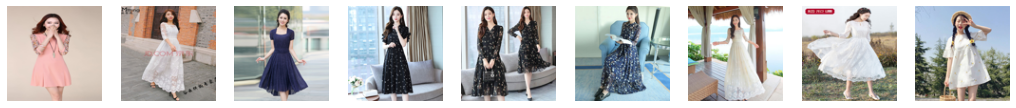

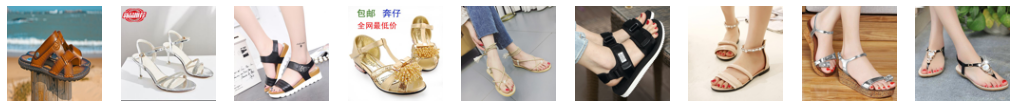

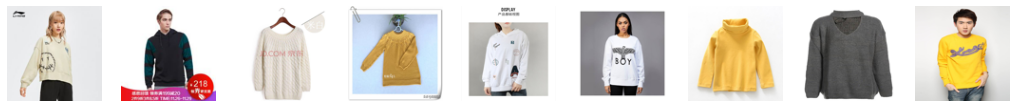

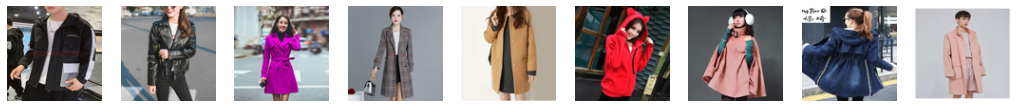

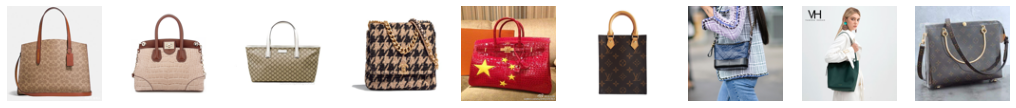

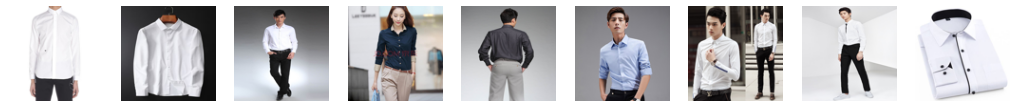

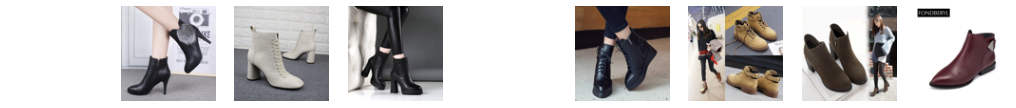

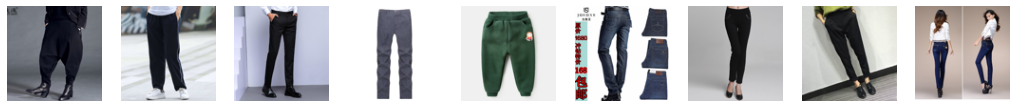

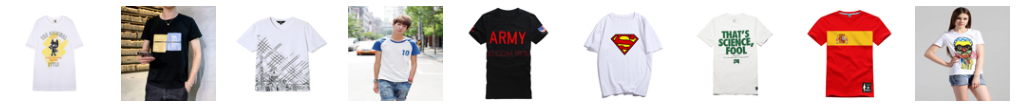

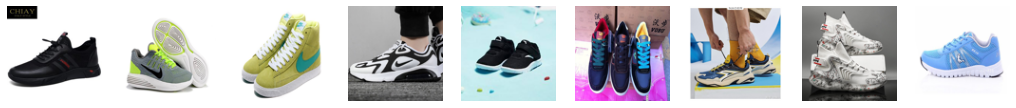

In [35]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
path='/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets/训练集' #训练集的路径
total_filenames=os.listdir(path) #列出所有训练集所有的文件夹
print(total_filenames)
# 删除'.DS_Store'，这个会在macos中报错
if '.DS_Store' in total_filenames:
    total_filenames.remove('.DS_Store')
    os.remove('datasets/训练集/'+'.DS_Store')
n=1 #展示图片的figure数
m=1 #图片数
for i in total_filenames: #列出所有训练集/文件夹/的所有文件夹
    file_show=os.listdir('datasets/训练集/'+i)
    plt.figure(figsize=(20,20))
    for j in file_show:
        img=Image.open('datasets/训练集/'+i+'/'+j)
        img=img.resize((100,100)) #这里为了好显示，就统一了所有图片的size
        plt.subplot(1,10,m)
        plt.axis('off') 
        plt.imshow(img)
#         plt.show()
        m+=1
        if m==10: # 开始下一组展示
            n+=1
            m=1
            break

## 6.用Tensorflow搭建CNN网络进行预测
这里，我想用tensorflow自己搭一个CNN网络来对爬取的图片进行预测。
此次的训练集大约有3000张照片。
### 1）导入第三方库

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
import os
import time

### 2)构建图像预处理函数
这个函数用于将文件夹中的图片，转换为训练集与预测集。  
同时生成tf训练CNN网络所需要的图片输入格式。

In [2]:
# 数据集加载函数，指明数据集的位置并统一处理为imgheight*imgwidth的大小，同时设置batch
def load_dataset(train_datasets_path,validate_datasets_path,img_height,img_width,batch_size):
    # 此处需要传入训练集、验证集地址，图片高、宽、batch
    # 加载训练集(此处调用tf的keras库，从目录中的图像文件生成tf.data.Dataset)
    train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
        train_datasets_path,#数据集所在的目录位置
        label_mode='categorical',#‘categorical’指标签被编码为分类向量
        seed=0,#用于shuffle和转换的可选随机种子
        image_size=(img_height,img_width),#图像处理大小
        batch_size=batch_size) #数据批次大小
    # 加载测试集(此处调用tf的keras库，从目录中的图像文件生成tf.data.Dataset)
    validate_dataset=tf.keras.preprocessing.image_dataset_from_directory(
        validate_datasets_path,#数据集所在的目录位置
        label_mode='categorical',#‘categorical’指标签被编码为分类向量
        seed=0,#用于shuffle和转换的可选随机种子
        image_size=(img_height,img_width),#图像处理大小
        batch_size=batch_size) #数据批次大小
    # 获得训练集的类名
    class_names=train_dataset.class_names
    # 返回处理之后的训练集、验证集和类名
    return train_dataset,validate_dataset,class_names

### 3)构建CNN网络

In [3]:
# 构建CNN模型
def CNN_modeltraining(class_num,IMG_SHAPE=(224,224,3)):
    # 搭建模型
    model=tf.keras.models.Sequential([
        # 对模型做归一化的处理，将0-255之间的数字统一处理到0到1之间
        # 归一化处理可以减少计算量，并且提高训练出的模型精度
        tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=IMG_SHAPE),
        # 卷积层，该卷积层的输出为32个通道
        # 此处使用的卷积核的大小是3*3，激活函数使用relu
        tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
        # 池化层，此处使用的kernel大小是2*2
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        # 增添另一个卷积池化
        # 卷积层，该卷积层的输出为64个通道
        # 此处使用的卷积核的大小是3*3，激活函数使用relu
        tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        # 池化层，此处使用的kernel大小是2*2
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        # 拉直层，将二维的输出转化为一维
        tf.keras.layers.Flatten(),
        # 全连接层，输出值维度为128，激活函数用的'relu'
        tf.keras.layers.Dense(128,activation='relu'),
        # 利用softmax函数的概率值进行分类
        tf.keras.layers.Dense(class_num,activation='softmax')])
    # 输出模型信息
    model.summary()
    # 配置模型训练方法，sgd优化器，损失函数为交叉熵函数，模型评价指标为正确率
    model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
    # 返回模型
    return model

### 4)定义训练函数

In [4]:
def train(train_datesets,validate_datasets,epochs=30):
    # train需传入参数：训练集、验证集文件目录，epoch为循环次数可以修改，默认30次
    # 开始训练，记录开始时间
    time_start=time.time()
    # 导入训练集和验证集(此处调用了加载数据函数)
    # 此处需要传入训练集、验证集地址，图片高、宽、batch
    train_dataset,validate_dataset,class_names=load_dataset(train_datesets,validate_datasets,224,224,16)
    print(class_names)
    # 创建CNN模型
    model=CNN_modeltraining(class_num=len(class_names))
    # 训练
    model.fit(train_dataset,validation_data=validate_dataset,epochs=epochs)
    # 保存训练好的模型以备后续使用
    model.save("models/CNN分类网上爬取的服装图片.h5")
    # 记录结束时间
    end_time=time.time()
    print(f'训练的总时间用时为：{end_time-time_start}秒')
    return class_names

### 5)定义预测函数

In [5]:
def predict(models,class_names,predict_img):
    # 导入已经训练好的模型
    model=tf.keras.models.load_model(models)
    # 写入要预测图片的地址
    predict_img=predict_img
    # 打开图片
    img_init=cv2.imread(predict_img)
    # 将图片大小调整到224*224用于图片编码，以及分类预测
    img=cv2.resize(img_init,(224,224))
    # 将图片转化为numpy的数组
    img=np.asarray(img)
    # 将图片输入得到分类结果
    outputs=model(img.reshape(1,224,224,3))
    result_index=int(np.argmax(outputs))
    # 获得对应的名称
    result=class_names[result_index]
    # 可视化
    plt.figure()
    img=Image.open(predict_img)
    plt.axis('off') 
    plt.imshow(img)
    plt.xlabel(result)
    # 最终打印结果
    print(f'此次预测结果为<{result}>')

### 6)开始训练！
此次的CNN模型，我一共使用了**接近2000张图片**，让我们来等待它慢慢训练(*^^*)

In [6]:
total_filenames=os.listdir('datasets/训练集')
# 删除'.DS_Store'，这个会在macos中报错
if '.DS_Store' in total_filenames:
    os.remove('datasets/训练集/'+'.DS_Store')
    
# 创建并训练CNN模型
train_datesets='/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets/训练集'
validate_datasets='/Users/rockyy/machinelearning_homework/report_03_Fashion/报告3/datasets/验证集'
# train需传入参数：训练集、验证集文件目录，epoch为循环次数可以修改，默认30次，这里我设置为16次
class_names=train(train_datesets=train_datesets,validate_datasets=validate_datasets,epochs=16)

Found 2772 files belonging to 10 classes.
Found 519 files belonging to 10 classes.
['T恤', '凉鞋', '包', '外套', '套头衫', '短靴', '衬衫', '裤子', '运动鞋', '连衣裙']
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624

2021-12-16 12:20:45.093243: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-16 12:20:45.093940: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


174/174 [==============================] - 47s 263ms/step - loss: 2.2884 - accuracy: 0.1287 - val_loss: 2.1834 - val_accuracy: 0.1522
Epoch 2/16
174/174 [==============================] - 46s 261ms/step - loss: 1.9911 - accuracy: 0.2833 - val_loss: 1.8751 - val_accuracy: 0.3526
Epoch 3/16
174/174 [==============================] - 47s 264ms/step - loss: 1.7861 - accuracy: 0.3753 - val_loss: 1.6135 - val_accuracy: 0.4393
Epoch 4/16
174/174 [==============================] - 48s 271ms/step - loss: 1.5794 - accuracy: 0.4704 - val_loss: 1.9658 - val_accuracy: 0.2466
Epoch 5/16
174/174 [==============================] - 61s 346ms/step - loss: 1.3808 - accuracy: 0.5348 - val_loss: 1.9841 - val_accuracy: 0.3160
Epoch 6/16
174/174 [==============================] - 55s 311ms/step - loss: 1.1745 - accuracy: 0.6087 - val_loss: 1.4946 - val_accuracy: 0.5626
Epoch 7/16
174/174 [==============================] - 53s 301ms/step - loss: 0.9767 - accuracy: 0.6806 - val_loss: 1.4555 - val_accuracy: 0.5

### 7)预测
从上面的模型训练看到，好像用验证集预测的精准度只有70%，来看看对预测集的预测。  
这里我先挑一张图片进行预测，然后再对多张图片预测进行可视化处理

此次预测结果为<T恤>


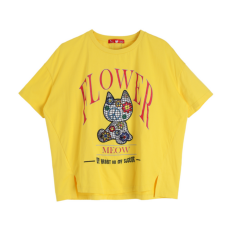

In [6]:
import matplotlib.pyplot as plt
img='datasets/预测集/T恤/T恤9.png' #填入需要预测图片的地址，这里我们就填一个预测集中的图片
model='TF训练好的models/CNN分类网上爬取的服装图片.h5' #填入模型地址，这里我们填入刚才生成的模型
class_names=['T恤', '凉鞋', '包', '外套', '套头衫', '短靴', '衬衫', '裤子', '运动鞋', '连衣裙']
predict(models=model,class_names=class_names,predict_img=img)

此次预测结果为<包>


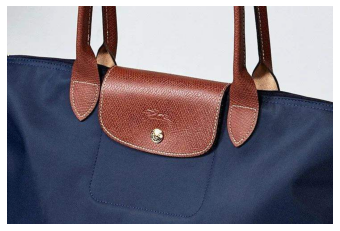

In [7]:
img='datasets/预测集/包/包9.png' #填入需要预测图片的地址，这里我们就填一个预测集中的图片
predict(models=model,class_names=class_names,predict_img=img)

此次预测结果为<外套>


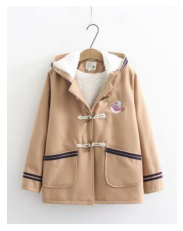

In [8]:
img='datasets/预测集/外套/外套1.png' #填入需要预测图片的地址，这里我们就填一个预测集中的图片
predict(models=model,class_names=class_names,predict_img=img)

此次预测结果为<连衣裙>


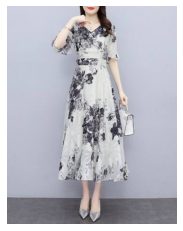

In [9]:
img='datasets/预测集/连衣裙/连衣裙10.png' #填入需要预测图片的地址，这里我们就填一个预测集中的图片
predict(models=model,class_names=class_names,predict_img=img)

此次预测结果为<套头衫>


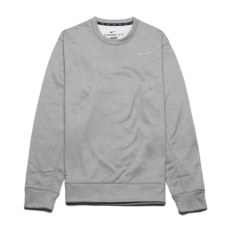

In [10]:
img='datasets/预测集/套头衫/套头衫16.png' #填入需要预测图片的地址，这里我们就填一个预测集中的图片
predict(models=model,class_names=class_names,predict_img=img)

此次预测结果为<裤子>


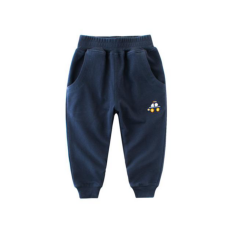

In [11]:
img='datasets/预测集/裤子/裤子1.png' #填入需要预测图片的地址，这里我们就填一个预测集中的图片
predict(models=model,class_names=class_names,predict_img=img)

此次预测结果为<衬衫>


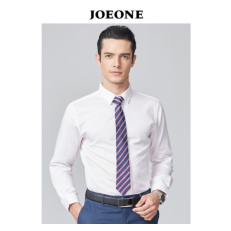

In [12]:
img='datasets/预测集/衬衫/衬衫9.png' #填入需要预测图片的地址，这里我们就填一个预测集中的图片
predict(models=model,class_names=class_names,predict_img=img)

可以见得，当我们改变img的位置时(也就是更换不同的预测图片时，可以得出预测的结果）
不过从训练过程的预测集来看，这个模型的精准度只有70%左右，不过对于训练集的预测却有99%的准确率，估计是训练的样本数量太少导致的，此次使用了**3000张图片进行训练**，可以考虑将样本增加至10000张图片，这样训练精度就估计比较高了！

## 心得

本次的报告使用是**用时最长的一个报告**了，前前后后花了有**一周多**的时间，不过虽然花了很多时间，但是终归还是非常有收获的，那么来总结本次都学到了些什么：

* 首先是学会了利用Tensorflow搭建CNN网络，建立的模型的质量也还算不错。（这里是因为在网上看到Tensorflow对苹果M1芯片有非常大的优化，所以想试一试效果就选择了使用TF，没有用当前比较流行的Pytorch）

  因为在敲代码的时候使用的是M1芯片的MacBook，所以安装Tensorflow的时候还费了不少功夫。先是需要在本地文档中下载**miniforge3**（貌似也是conda的简洁版），然后就是在miniforge3中创建虚拟环境，从网上下载适配优化M1的Tensorflow安装包后，直接放进刚才创建的虚拟环境中，然后在“终端”输入“conda activate tf24 “就可以激活这个虚拟环境了。不过不太理解的就是，最开始安装的是**Tensorflow2.6**版本，但是一运行就会报错，说的Numpy与Python版本不兼容（因为Tensorflow也用到了Numpy，所以一调用TF就会出错），在网上搜寻了许久之后都找不到解决方案（(｡ì _ í｡)就是这个原因卡了好多个小时），然后不得不尝试**Tensorflow2.4**，幸好最后发现TF2.4还能够使用，不然忙活安装一下午的Tensorflow都白干了。

  不过虽然安装的过程很复杂，但是因为MACOS的系统与Linux比较像，很多地方都需要用代码来执行，所以其实在安装的过程中，也提高了自己对于**用代码操作系统**的熟练度。

  然后就是自己花了几天多的时间学习如何用Tensorflow搭建CNN，因为前期对于搭建CNN理论的流程还比较熟悉，所以其实学习写代码的过程也还是挺流畅的。

* 学会了制作简单的爬虫代码，可以从百度上爬取自定义的图片。

  其实在分析了网上关于爬虫的示例之后，发现要想写一个简单的爬虫是比较容易的一件事，因为写爬虫不像“机器学习”需要先学习理论的知识，爬虫只需要**调用第三方库“re”、“requests“、”os“**等再自己搭建一些外部环境即可，所有总的说来这一部分的学习并没有花掉太多的时间。

  不过虽然在写爬虫代码没花长时间，但是在保存和处理图片时遇到了一些问题。比如，直接从网上爬取的图片**”强行“**保存成”PNG“或者”JEPG“格式的话可能会出错，虽然后缀名时.png或者.jepg，但是实际上图片并不是这样的格式，在用这种图片训练模型时就会报错，提示文件的格式不正确。一开始，测试模型代码的时候，因为图片数量较少，**所以我是自己到文件夹里面去一张一张看**，哪一张的图片是有问题的。不过随着后期训练时图片数量增多，到了几千张的时候，我发现**这样去检查效率极低**，所以，就在网上搜索了如何检测图片是否类型正确，网上关于这一话题的讨论很多，不过与我需要的都不太相关，好在经过一番搜寻之后，找到了相关的判断示例，自己便模仿其示例写了一段我这里适用的代码，并能成功运行。这样，就能**实现自动判断图片是否是正确**所需的。

  另外，有时候从百度上爬取的图片是**“空图片”**，就是图片大小只有2KB左右，打开一看就是一片空白，所以这种图片我们也不能需要，于是我也写了一段用os.path.getsize来判定图片大小是否满足“一般图片”的属性。

* 还有个很让我疑惑的地方，就是本次的训练一共使用了**大概接近2000张图片**，不过训练的时候，**差不多只用了15次左右的循环，训练集的识别精度已经达到了99%**，不过**验证集的精度只有70%多**。这一点我估计是因为训练集的样本数太少了导致的，这次只使用了**3000张图片**，如果将样本增添到**10000张**，可能精度就会好很多。

* 因为本次学习的新东西很多，比如搭建CNN、写爬虫代码，所以为了后面看得懂，我基本上对每条代码都添加了注释，养成写注释的习惯感觉还挺重要的(#^.^#)



## 写在最后(课程总结报告)

本次的机器学习课程也随着这一次的报告完笔而结束了，**感谢布老师对这门课的辛苦付出！**让我从学期初对机器学习的懵懂无知，到学期末能够简单运用机器学习理论进行实际工作。这一个过程历经了很多困难，遇到了很多问题，不过克服了这些困难，解决了这些问题，就会对这一切豁然开朗。我也随着布老师的课程，从机器学习的应用领域开始，到最简单的KNN到后面越来越复杂的全连接神经网络、对抗神经网络，再到写报告时候的卷积神经网络等等。而这门课程布老师带来的不仅是机器学习的知识，更多的教会我了如何去学习，因为之前对于编程涉足较少，所以对于学习编程没有系统性的方式方法，但是经过了这一学期的锻炼，对于这方面的学习，我也是掌握到了一些方法技巧。**虽然课程结束了，但是学习之路还很漫长，利用好时间，把握好机会，努力(^_^)a！最后，再次感谢布老师的对这门课的用心、负责，感谢布老师教会的学习方法↖(^ω^)↗**







